In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import math

In [2]:
filename='Lab 5.csv'
headers=['time','ec','k4','k5','rmy','esb','yvr']
dtypes = ['datetime', 'float','float','float','float','float','float']
df = pd.read_csv(filename,names=headers, usecols = [0,1,3,4,5,6,7],header=0)
# df = pd.read_csv(filename,usecols = [0,1,3,4,5,6,7],header=0)
df

,time,ec,k4,k5,rmy,esb,yvr
0,11:26:00 AM,29.50,1016.0,1016.3,100.3,1014.4,29.99
1,11:43:00 AM,29.51,1016.1,1016.5,100.3,1014.4,29.96
2,11:59:00 AM,29.51,1015.6,1016.1,100.2,1014.2,29.96
3,12:13:00 PM,29.51,1014.6,1015.1,100.1,1013.4,29.94
4,12:28:00 PM,29.49,1013.8,1014.3,100.1,1012.4,29.91
5,12:40:00 PM,29.49,1013.5,1014.1,100.0,1011.8,29.91


### Conversion Units

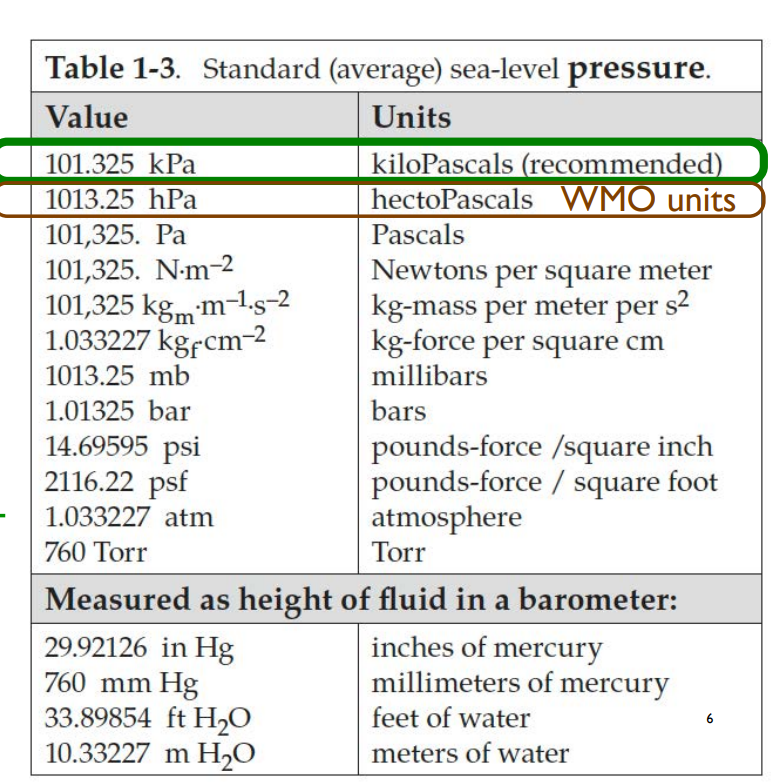

## Gravity Correction for Eco-Celli

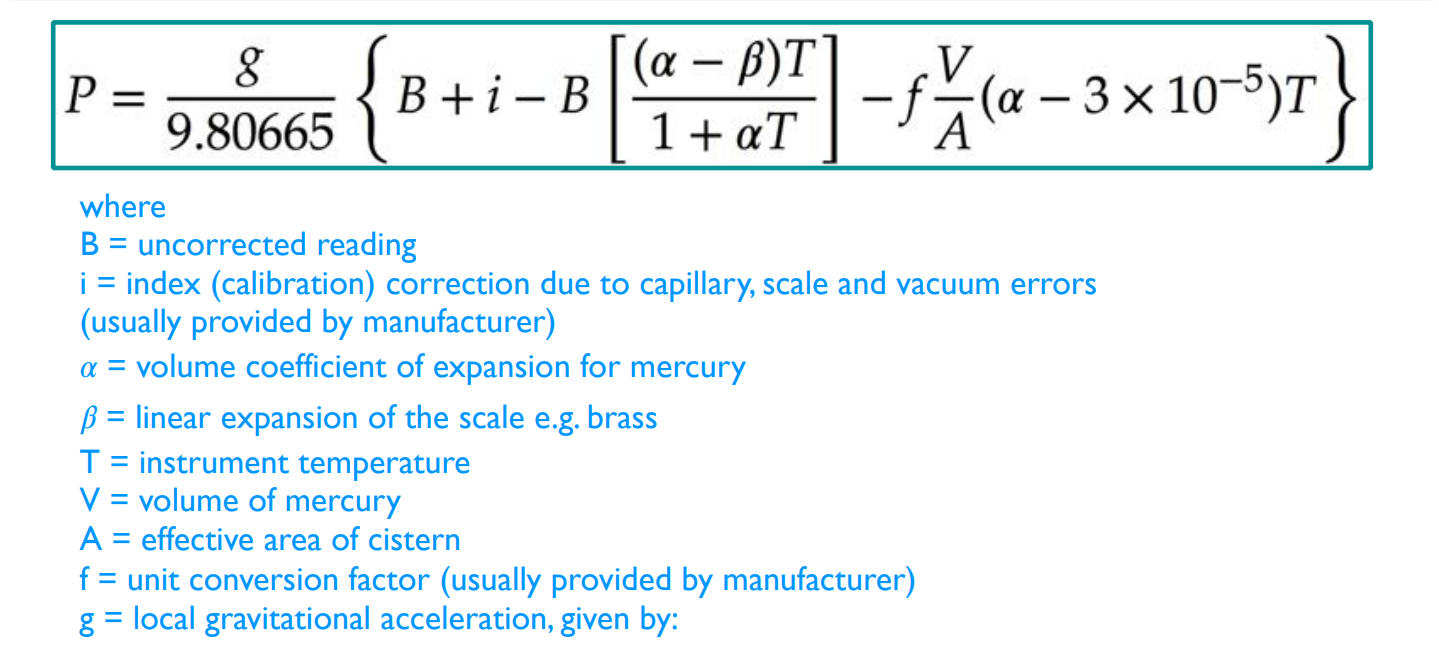

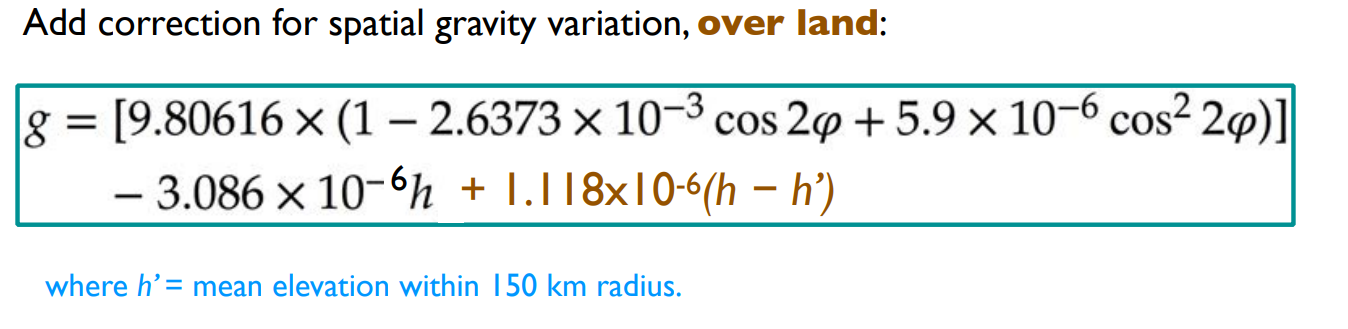


We assume teh index correction, i = 0 because the Eco-Celli was calibrated to the temperature before the lab began, making it a safe assumption that the index correction factor i is 0. 

As for the temperature correction, I assumed this to be 0 as well because the Eco-Celli was not filled with mercury, while all of the corrections are with mercury as a function of temperature. These temperature effects must be compensated, which they were by the initial calibration between the pressure and temperature. 

The mean height was estimated at 5.182 m, as per the geoid height from the EGM96 model. The 105m height ASL for UBC is assumed as per the calibration of the Kestrels. 


Geoid Height Results:
source: https://www.unavco.org/software/geodetic-utilities/geoid-height-calculator/geoid-height
- Latitude: 49.2606° N = 49° 15' 38.16" N
- Longitude: 123.246° E = 123° 14' 45.6" E
- GPS ellipsoidal height: 105 (meters)
- Geoid height: 5.182 (meters)

The sea level reduction was done using the formula given in the WMO	Ch.	3 (https://library.wmo.int/doc_num.php?explnum_id=3150 guide, section 3.11.1, equation 3.1:

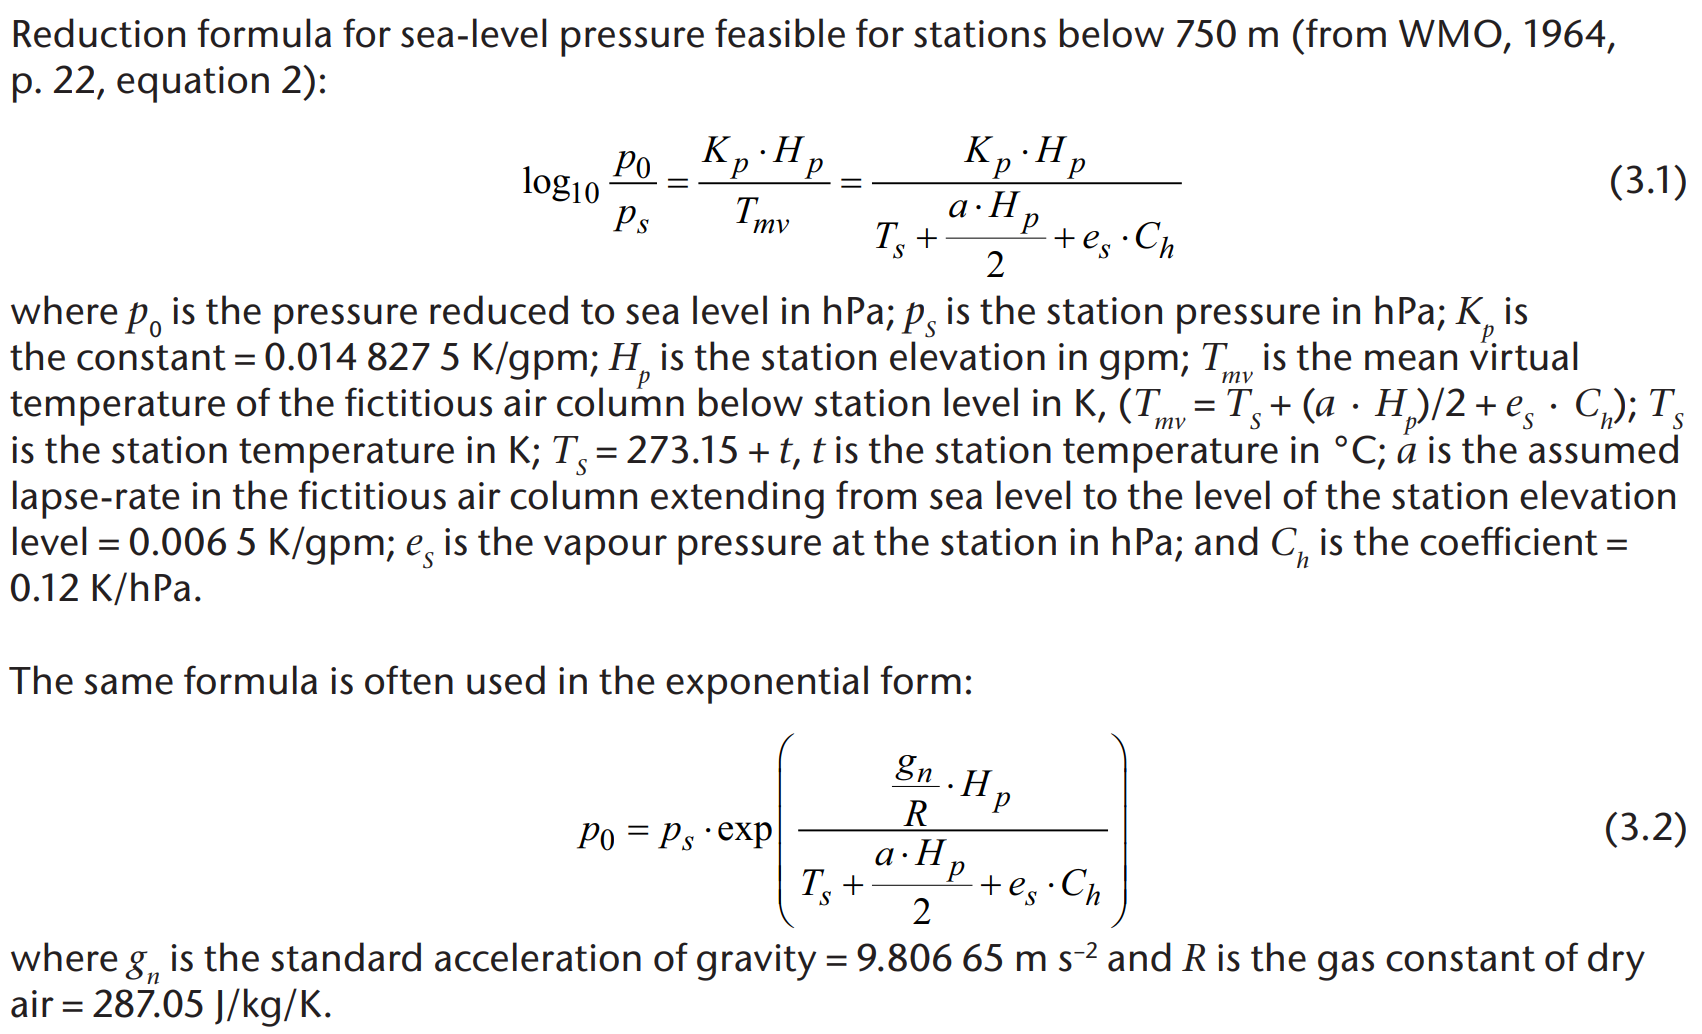

In [3]:
LAT=49.2606
HEIGHT=150  #meters ASL
MEAN_HEIGHT=5.182 #meters ASL


def gravity_cor(lat,height,mean_height,raw):
    g=spatial_gravity(lat,height,mean_height)
    P= (g*raw)/9.80665
    return P
 

    
def spatial_gravity(lat,height,mean_height):
    h = (height-mean_height)
    h = (1.118e-6)*h
    h = ((3.086e-6)*height)+h
    g = 1-((2.6373e-3)*math.cos(2*lat))+((5.9e-6)*(math.cos(2*lat)**2))
    g = 9.80616*g
    g = g-h
    return g
    
    
        
def inHG_to_kPa(x):
    return (x*101.325)/29.92126

def hPa_to_kPa(x):
    return (x*101.325)/1013.25

# df['ec'] = df['ec'].apply(inHG_to_kPa)
# df['yvr'] = df['yvr'].apply(inHG_to_kPa)
# df['k4'] = df['k4'].apply(hPa_to_kPa)
# df['k5'] = df['k5'].apply(hPa_to_kPa)
# df['esb'] = df['esb'].apply(hPa_to_kPa)

